<a href="https://colab.research.google.com/github/AmandaMartins12/Data_Analyst_Portfolio/blob/main/Linear_Regression_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Finding the number of days to deliver products for an e-commerce company using Linear Regression**

---



Linear regression is a statistical technique that allows us to model the relationship between a dependent variable (target) and one or more independent or variables (predictors). Through this technique, we can better understand how variables are related and how they influence each other. In the model below, simple linear regression was used to help an e-commerce company calculate the number of days for delivery, taking into account the freight cost of the product and the particularities of each region of the country.

###**Importing Libraries**

In [ ]:
import pandas as pd
import plotly  as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

### **Collecting the data**


In [ ]:
 delivery_days = pd.read_csv("/content/freight.csv", sep = ";")

###**Analyzing the collected data**

In [ ]:
#viewing database files
delivery_days.head()

,Região,Valor do Frete,Dias para Entrega
0,Norte,49.59,20.0
1,Norte,117.57,3.0
2,Norte,98.15,7.0
3,Norte,96.98,6.0
4,Norte,123.00,6.0


In [ ]:
# filtering data from the southeast
southeast_data = delivery_days.query ('Região == "Sudeste"')
southeast_data.head()

,Região,Valor do Frete,Dias para Entrega
200,Sudeste,106.04,8.0
201,Sudeste,103.51,1.0
202,Sudeste,82.69,13.0
203,Sudeste,108.23,4.0
204,Sudeste,116.11,1.0


###**Analyzing the data from the Southeast Region**

The analysis was done taking into account the particularities of each region. Thus, to demonstrate the model's operation, data from the Southeast Region was used. However, the same procedure can be applied to the other regions of Brazil.

In [ ]:
#generating some statistics from the database
southeast_data.describe()

,Valor do Frete,Dias para Entrega
count,100.000000,100.000000
mean,87.186500,8.120000
std,22.707019,5.733615
min,19.170000,1.000000
25%,73.017500,3.750000
50%,89.240000,7.000000
75%,106.190000,12.000000
max,119.570000,26.000000


In [ ]:
# checking if there are any null or missing values
southeast_data.isna().sum()

Região               0
Valor do Frete       0
Dias para Entrega    0
dtype: int64

In [ ]:
#checking database data types
southeast_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 200 to 299
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Região             100 non-null    object 
 1   Valor do Frete     100 non-null    float64
 2   Dias para Entrega  100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


###**Correlation Analysis between data**

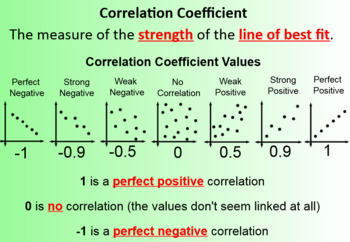

Some important points about the correlation is its strength and whether it is positive or negative.

*   **Positive Correlation** - is when two variables that grow or decrease together, that is, have a direct relationship.
* **Negative correlation** - is when one variable increases and the other decreases, or vice versa.

*   In addition, the strength of the correlation is defined by the correlation coefficient, which can vary between **-1** and **1**. The closer to these values, the correlation is called strong.






In [ ]:
#finding the correlation
southeast_data.corr()

<ipython-input-23-294e5e4398f2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  southeast_data.corr()


,Valor do Frete,Dias para Entrega
Valor do Frete,1.000000,-0.900648
Dias para Entrega,-0.900648,1.000000


<ipython-input-24-058045db5872>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = southeast_data.corr()


<Axes: >

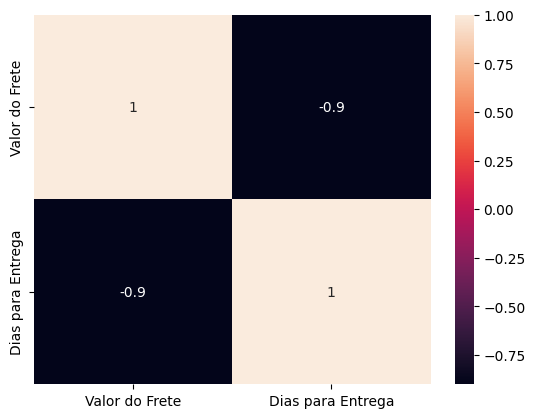

In [ ]:
#graphical correlation analysis
correlacao = southeast_data.corr()
sns.heatmap(correlacao, annot=True)

Therefore, it can be concluded that the **"Freight Value"** and the **"Days for Delivery"** have a **strong positive linear correlation** because the correlation coefficient "**-0.9**" is very close to "**-1**". In other words, when the delivery day varies, the freight value also varies and this variation occurs in a direct way (when one increases, the other also increases or vice versa).

###**Data Treatment**

###**Creating the predictor variable (X) - Freight Cost**

In [ ]:
x = southeast_data.iloc[:,1].values
print(x)

[106.04 103.51  82.69 108.23 116.11 116.26  92.89 116.46 111.23  48.95
  41.5   78.98 102.68  63.54  92.67  49.36  59.45  89.51  91.84  70.88
 115.21  60.42 119.57  66.   118.7   37.7   88.29  56.9   87.75 101.31
  82.85  65.84  96.94  68.87  33.47  60.72 100.98 106.64 109.98  84.89
  76.32 100.53 117.47  86.73 115.8   69.96  98.35  84.64 118.49  94.12
  89.33  82.59 100.33 117.05  85.69  59.6  108.99  95.84 118.57  50.12
  80.26  74.58  57.69  60.26 115.93  88.84  92.82  89.15  96.69 114.66
 114.56  60.02  91.63 119.06  98.77  88.12  59.78  95.71  74.45  95.53
  87.85 109.58  19.17 107.31 107.27  93.99  83.67  73.73  84.72  75.63
  78.52  77.17  51.31  46.94 102.65  84.04 108.2   96.42 115.34  70.3 ]


###**Creating the target variable (Y) - Days to Delivery**

In [ ]:
y = southeast_data.iloc[:,2].values
print(y)

[ 8.  1. 13.  4.  1.  2. 11.  1.  4. 15. 18.  7.  6. 17.  9. 20. 16.  3.
  5. 11.  2. 18.  3. 13.  1. 17.  5. 16.  7.  4. 10. 15.  5.  9. 23. 12.
  9.  7.  1.  7.  6.  4.  1.  8.  1. 13.  9.  6.  2. 11. 11. 10.  8.  1.
 13. 16.  1.  5.  4. 19. 12. 10. 13. 12.  2.  3.  4.  7.  8.  3.  1. 16.
  2.  1.  2.  5. 15.  2.  8. 11.  5.  1. 26.  4.  1. 10.  7. 10.  7. 13.
 11. 12. 16. 14.  2.  5.  4.  4.  5. 13.]


###**Checking Variable Types**

In [ ]:
type(x)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
x.shape

(100,)

###**Transforming array into matrix**

In [ ]:
x = x.reshape(-1,1)

In [ ]:
x.shape

(100, 1)

###**Creating the Machine Learning Model**

In [ ]:
from sklearn.linear_model import LinearRegression
prediction_delivery_days = LinearRegression()

In [ ]:
type(prediction_delivery_days)

sklearn.linear_model._base.LinearRegression

In [ ]:
prediction_delivery_days.fit(x, y)

LinearRegression()

### **Calculating the Intersection of the Line**

In [ ]:
prediction_delivery_days.intercept_

27.94772254633564

###**Calculating the Angular Coefficient of the Line**

In [ ]:
prediction_delivery_days.coef_

array([-0.22741735])

##**Predicting Days to Delivery**

In [ ]:
prediction_values = prediction_delivery_days.predict(x)

In [ ]:
x

array([[106.04],
       [103.51],
       [ 82.69],
       [108.23],
       [116.11],
       [116.26],
       [ 92.89],
       [116.46],
       [111.23],
       [ 48.95],
       [ 41.5 ],
       [ 78.98],
       [102.68],
       [ 63.54],
       [ 92.67],
       [ 49.36],
       [ 59.45],
       [ 89.51],
       [ 91.84],
       [ 70.88],
       [115.21],
       [ 60.42],
       [119.57],
       [ 66.  ],
       [118.7 ],
       [ 37.7 ],
       [ 88.29],
       [ 56.9 ],
       [ 87.75],
       [101.31],
       [ 82.85],
       [ 65.84],
       [ 96.94],
       [ 68.87],
       [ 33.47],
       [ 60.72],
       [100.98],
       [106.64],
       [109.98],
       [ 84.89],
       [ 76.32],
       [100.53],
       [117.47],
       [ 86.73],
       [115.8 ],
       [ 69.96],
       [ 98.35],
       [ 84.64],
       [118.49],
       [ 94.12],
       [ 89.33],
       [ 82.59],
       [100.33],
       [117.05],
       [ 85.69],
       [ 59.6 ],
       [108.99],
       [ 95.84],
       [118.57

In [ ]:
#view the forecasts for the days for delivery
prediction_values

array([ 3.83238704,  4.40775293,  9.1425821 ,  3.33434305,  1.54229436,
        1.50818175,  6.82292516,  1.46269829,  2.65209101, 16.8156434 ,
       18.50990264,  9.98630046,  4.59650933, 13.4976243 ,  6.87295698,
       16.72240229, 14.42776125,  7.59159579,  7.06171337, 11.82838097,
        1.74696997, 14.20716643,  0.75543034, 12.93817763,  0.95328343,
       19.37408855,  7.86904496, 15.00767549,  7.99185032,  4.9080711 ,
        9.10619533, 12.9745644 ,  5.9018849 , 12.28548984, 20.33606393,
       14.13894122,  4.98311882,  3.69593664,  2.9363627 ,  8.64226394,
       10.5912306 ,  5.08545663,  1.23300676,  8.22381602,  1.61279373,
       12.03760493,  5.58122644,  8.69911827,  1.00104107,  6.54320182,
        7.63253092,  9.16532384,  5.1309401 ,  1.32852205,  8.46033006,
       14.39364865,  3.16150587,  6.15204399,  0.98284768, 16.5495651 ,
        9.69520626, 10.98693679, 14.82801578, 14.2435532 ,  1.58322948,
        7.74396542,  6.83884437,  7.67346604,  5.95873924,  1.87

##**Generating a Graphical View of the Data**

In [ ]:
#Graphic 1
import plotly.express as px
graph = px.scatter(x = x.ravel(), y=y)
graph.show()

In [ ]:
#Graphic 2
graph = px.scatter(x=x.ravel(), y=y)
graph.add_scatter(x=x.ravel(), y = prediction_values, name = "previsões")
display(graph)

##**Calculating delivery days according to the equation**

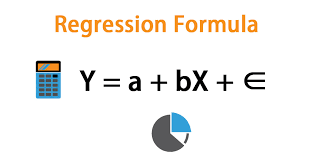

In [ ]:
#Checking the values of a certain forecast based on the freight value
alfa = prediction_delivery_days.intercept_
beta = prediction_delivery_days.coef_
X = 118

Y = alfa + beta * X

array([1.11247557])

One way to get the amount of days to delivery is through the equation above, in which the variable **X** represents the **value of freight** and the variable **Y** what we want to find out (**days to delivery**).  In the example above, the number of days for delivery was calculated for a freight of R$ 118,00

##**Calculating delivery days using the model's predict function**

In [ ]:
#Calculating in a direct way

prediction_delivery_days.predict([[52.98]])

array([15.89915149])

In [ ]:
round(15.89915149, 0)

16.0

Another way to calculate the amount of days for delivery is with the predict function. In the example above, we calculated the days to delivery for a freight of R$ 52,98.

##**Model Evaluation**

In [ ]:
#Calculating the model's accuracy
prediction_delivery_days.score(x,y)

0.8111671052762233

##**Mean absoluted error**

In [ ]:
#Calculating the Mean Absoluted Error
mean_absolute_error(y, prediction_values)

2.091861170350245

##**Mean squared error**

In [ ]:
#Calculating the Mean Squared Error
MSE = mean_squared_error(y, prediction_values)
print(MSE)

96.3902452402291


##**Root mean squared error**

In [ ]:
#Calculating the Root Mean Squared Error
np.sqrt(MSE)

9.817853392683611